# Part II - Vehicle Properties and the effects on CO2 emissions
## by Boddington Anesu Muzvidzwa
## Introduction

This is a dataset from Canada  that consists of carbon dioxide emissions produced by differet vheicles form different car makes, other variables like fuel type and fuel consumption for each vehicle are also included in the dataset.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#reading the file in
co2 = pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
#getting column and data types info
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
#viewig the table 
co2

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

### Understanding the data

In [6]:
data_info = pd.read_csv('Data Description.csv')

In [7]:
data_info

Understanding the Data                                         Unnamed: 1
0                   Model                         4WD/4X4 = Four-wheel drive
1                     NaN                              AWD = All-wheel drive
2                     NaN                        FFV = Flexible-fuel vehicle
3                     NaN                              SWB = Short wheelbase
4                     NaN                               LWB = Long wheelbase
5                     NaN                           EWB = Extended wheelbase
6            Transmission                                      A = automatic
7                     NaN                              AM = automated manual
8                     NaN                   AS = automatic with select shift
9                     NaN                         AV = continuously variable
10                    NaN                                         M = manual
11                    NaN                           3 - 10 = Number of gears
12              Fuel type                               X = regular gasoline
13                    NaN                               Z = premium gasoline
14                    NaN                                         D = diesel
15                    NaN                                  E = ethanol (E85)
16                    NaN                                    N = natural gas
17       Fuel consumption  City and highway fuel consumption ratings are ...
18          CO2 emissions  the tailpipe emissions of carbon dioxide (in g...

In [8]:
#renaming the columns to remove spaces (as to reduce invalid syntax errors)
co2.rename(columns = {'Vehicle Class':'Vehicle_Class',
                       'Engine Size(L)':'Engine_Size(L)',
                      'Fuel Type':'Fuel_Type', 
                      'Fuel Consumption City (L/100 km)':'Fuel_Consumption_City(L/100km)',
                      'Fuel Consumption Hwy (L/100 km)':'Fuel_Consumption_Hwy(L/100km)',
                      'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption_Comb(L/100km)',
                      'Fuel Consumption Comb (mpg)':'Fuel_Consumption_Comb(mpg)',
                      'CO2 Emissions(g/km)':'CO2_Emissions(g/km)'}, inplace = True)

In [9]:
co2

Make        Model   Vehicle_Class  Engine_Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel_Type  Fuel_Consumption_City(L/100km)  \
0             AS5         Z                             9.9   
1              M6         Z                            11.2   
2             AV7         Z                             6.0   
3             AS6         Z                            12.7   
4             AS6         Z                            12.1   
...           ...       ...                             ...   
7380          AS8         Z                            10.7   
7381          AS8         Z                            11.2   
7382          AS8         Z                            11.7   
7383          AS8         Z                            11.2   
7384          AS8         Z                            12.2   

      Fuel_Consumption_Hwy(L/100km)  Fuel_Consumption_Comb(L/100km)  \
0                               6.7                             8.5   
1                               7.7                             9.6   
2                               5.8                             5.9   
3                               9.1                            11.1   
4                               8.7                            10.6   
...                             ...                             ...   
7380                            7.7                             9.4   
7381                            8.3                             9.9   
7382                            8.6                            10.3   
7383                            8.3                             9.9   
7384                            8.7                            10.7   

      Fuel_Consumption_Comb(mpg)  CO2_Emissions(g/km)  
0                             33                  196  
1                             29                  221  
2                             48                  136  
3                             25                  255  
4                             27                  244  
...                          ...                  ...  
7380                          30                  219  
7381                          29                  232  
7382                          27                  240  
7383                          29                  232  
7384                          26                  248  

[7385 rows x 12 columns]

In [10]:
#replacing  hyphens with underscores
co2['Vehicle_Class'] = co2['Vehicle_Class'].str.replace(" - ","_")
co2['Vehicle_Class'] = co2['Vehicle_Class'].str.replace("-","_")

co2

Make        Model Vehicle_Class  Engine_Size(L)  Cylinders  \
0     ACURA          ILX       COMPACT             2.0          4   
1     ACURA          ILX       COMPACT             2.4          4   
2     ACURA   ILX HYBRID       COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV_SMALL             3.5          6   
4     ACURA      RDX AWD     SUV_SMALL             3.5          6   
...     ...          ...           ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV_SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV_SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV_SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV_STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV_STANDARD             2.0          4   

     Transmission Fuel_Type  Fuel_Consumption_City(L/100km)  \
0             AS5         Z                             9.9   
1              M6         Z                            11.2   
2             AV7         Z                             6.0   
3             AS6         Z                            12.7   
4             AS6         Z                            12.1   
...           ...       ...                             ...   
7380          AS8         Z                            10.7   
7381          AS8         Z                            11.2   
7382          AS8         Z                            11.7   
7383          AS8         Z                            11.2   
7384          AS8         Z                            12.2   

      Fuel_Consumption_Hwy(L/100km)  Fuel_Consumption_Comb(L/100km)  \
0                               6.7                             8.5   
1                               7.7                             9.6   
2                               5.8                             5.9   
3                               9.1                            11.1   
4                               8.7                            10.6   
...                             ...                             ...   
7380                            7.7                             9.4   
7381                            8.3                             9.9   
7382                            8.6                            10.3   
7383                            8.3                             9.9   
7384                            8.7                            10.7   

      Fuel_Consumption_Comb(mpg)  CO2_Emissions(g/km)  
0                             33                  196  
1                             29                  221  
2                             48                  136  
3                             25                  255  
4                             27                  244  
...                          ...                  ...  
7380                          30                  219  
7381                          29                  232  
7382                          27                  240  
7383                          29                  232  
7384                          26                  248  

[7385 rows x 12 columns]

In [11]:
#overview of the different types of transmission
co2["Transmission"].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [12]:
#checking if all transmissions have gear numbers
gears = pd.DataFrame(co2.Transmission.str.extract('(\d+)', expand=True))
gears.isnull().sum()
                     

0    295
dtype: int64

In [13]:
#not all trasnmissions have gear numbers 
#number of gears will be removed for the sake of this analysis

co2['Transmission'] = co2.Transmission.str.replace('(\d)','', regex = True )
co2

Make        Model Vehicle_Class  Engine_Size(L)  Cylinders  \
0     ACURA          ILX       COMPACT             2.0          4   
1     ACURA          ILX       COMPACT             2.4          4   
2     ACURA   ILX HYBRID       COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV_SMALL             3.5          6   
4     ACURA      RDX AWD     SUV_SMALL             3.5          6   
...     ...          ...           ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV_SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV_SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV_SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV_STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV_STANDARD             2.0          4   

     Transmission Fuel_Type  Fuel_Consumption_City(L/100km)  \
0              AS         Z                             9.9   
1               M         Z                            11.2   
2              AV         Z                             6.0   
3              AS         Z                            12.7   
4              AS         Z                            12.1   
...           ...       ...                             ...   
7380           AS         Z                            10.7   
7381           AS         Z                            11.2   
7382           AS         Z                            11.7   
7383           AS         Z                            11.2   
7384           AS         Z                            12.2   

      Fuel_Consumption_Hwy(L/100km)  Fuel_Consumption_Comb(L/100km)  \
0                               6.7                             8.5   
1                               7.7                             9.6   
2                               5.8                             5.9   
3                               9.1                            11.1   
4                               8.7                            10.6   
...                             ...                             ...   
7380                            7.7                             9.4   
7381                            8.3                             9.9   
7382                            8.6                            10.3   
7383                            8.3                             9.9   
7384                            8.7                            10.7   

      Fuel_Consumption_Comb(mpg)  CO2_Emissions(g/km)  
0                             33                  196  
1                             29                  221  
2                             48                  136  
3                             25                  255  
4                             27                  244  
...                          ...                  ...  
7380                          30                  219  
7381                          29                  232  
7382                          27                  240  
7383                          29                  232  
7384                          26                  248  

[7385 rows x 12 columns]

In [14]:
#changing datatypes Transmission, vehicle class and Fuel Type

for col in ['Vehicle_Class','Fuel_Type','Transmission','Make']:
   
    co2[col] = co2[col].astype('category')
    


In [15]:
#checking if the categories were changed
co2.dtypes

Make                              category
Model                               object
Vehicle_Class                     category
Engine_Size(L)                     float64
Cylinders                            int64
Transmission                      category
Fuel_Type                         category
Fuel_Consumption_City(L/100km)     float64
Fuel_Consumption_Hwy(L/100km)      float64
Fuel_Consumption_Comb(L/100km)     float64
Fuel_Consumption_Comb(mpg)           int64
CO2_Emissions(g/km)                  int64
dtype: object

In [16]:
co2['Vehicle_Class'].value_counts()

SUV_SMALL                  1217
MID_SIZE                   1133
COMPACT                    1022
SUV_STANDARD                735
FULL_SIZE                   639
SUBCOMPACT                  606
PICKUP TRUCK_STANDARD       538
TWO_SEATER                  460
MINICOMPACT                 326
STATION WAGON_SMALL         252
PICKUP TRUCK_SMALL          159
MINIVAN                      80
SPECIAL PURPOSE VEHICLE      77
VAN_PASSENGER                66
STATION WAGON_MID_SIZE       53
VAN_CARGO                    22
Name: Vehicle_Class, dtype: int64

### Converting Units

> we are going to convert g/km to g/100km so that we can plot variables against each in the same SI untis

> conversion is 1g/km = 100 g/100km



In [17]:
# Convertg/km to g/100km by mathematical operation (multiply co2(g/km) by 100)
co2['CO2_Emissions(g/100km)'] = 100*co2["CO2_Emissions(g/km)"]




In [18]:
co2

Make        Model Vehicle_Class  Engine_Size(L)  Cylinders  \
0     ACURA          ILX       COMPACT             2.0          4   
1     ACURA          ILX       COMPACT             2.4          4   
2     ACURA   ILX HYBRID       COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV_SMALL             3.5          6   
4     ACURA      RDX AWD     SUV_SMALL             3.5          6   
...     ...          ...           ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV_SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV_SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV_SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV_STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV_STANDARD             2.0          4   

     Transmission Fuel_Type  Fuel_Consumption_City(L/100km)  \
0              AS         Z                             9.9   
1               M         Z                            11.2   
2              AV         Z                             6.0   
3              AS         Z                            12.7   
4              AS         Z                            12.1   
...           ...       ...                             ...   
7380           AS         Z                            10.7   
7381           AS         Z                            11.2   
7382           AS         Z                            11.7   
7383           AS         Z                            11.2   
7384           AS         Z                            12.2   

      Fuel_Consumption_Hwy(L/100km)  Fuel_Consumption_Comb(L/100km)  \
0                               6.7                             8.5   
1                               7.7                             9.6   
2                               5.8                             5.9   
3                               9.1                            11.1   
4                               8.7                            10.6   
...                             ...                             ...   
7380                            7.7                             9.4   
7381                            8.3                             9.9   
7382                            8.6                            10.3   
7383                            8.3                             9.9   
7384                            8.7                            10.7   

      Fuel_Consumption_Comb(mpg)  CO2_Emissions(g/km)  CO2_Emissions(g/100km)  
0                             33                  196                   19600  
1                             29                  221                   22100  
2                             48                  136                   13600  
3                             25                  255                   25500  
4                             27                  244                   24400  
...                          ...                  ...                     ...  
7380                          30                  219                   21900  
7381                          29                  232                   23200  
7382                          27                  240                   24000  
7383                          29                  232                   23200  
7384                          26                  248                   24800  

[7385 rows x 13 columns]

### What is the structure of your dataset?
> The dataset consists of 7385 cars with the following features Make, Model, Vehicle class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km),  Fuel Consumption Comb (mpg) and finally CO2 Emissions(g/km)

> The features such as Model, vehicle class, transmission and Fuel Type are nominal factor variables.

#### Fuel type meanings
> D - Diesel

> E - Ethanol

> N - Natural Gas

> X - Regualr Gas

> Z - Premium Gasoline

#### Transmission Types
> A - Automatic

> AM - Automated Manuel

> AS - Aoutomatic with select shift

> AV - Continously Variable 

> M - Manual

### What is/are the main feature(s) of interest in your dataset?

> Areas of interest will be what features contribute to the least amount of Carbon Dioxide Emmissions(CO2).


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I hypothesise that Engine Size(L) will have an effect on CO2 emmisions: the larger the engine size the greater the amount of emmissions.

> We also investigate how Engine size is related to Fuel consumption and  which vehicle class has the lowest Fuel Consumption.

> Fuel Type will also play a big role as modern and alternative fuel types will produce the least amount of CO2 this will have a biggeer influence than the engine size.

> Finally we will also investigate which vehicle class  is associated with the least CO2 emmissions



## Univariate Exploration



#### Will start by looking at the destribution of C02 emmissions

In [19]:
#statistics on the co2 emissions
co2['CO2_Emissions(g/km)'].describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2_Emissions(g/km), dtype: float64

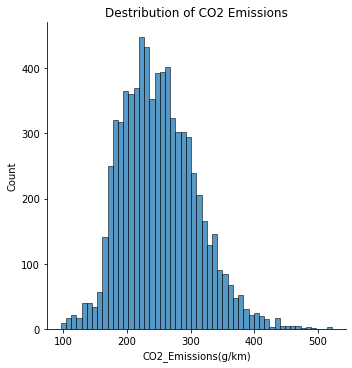

In [20]:
#histogram showing the destribution of co2
sb.displot(co2['CO2_Emissions(g/km)'], kde=False)
plt.title('Destribution of CO2 Emissions');

>The graph is slightly right skewed with most cars producing between 200g/km t0 300g/km of carbon dioxide 

In [62]:
co2['Fuel_Consumption_Comb(mpg)'].describe()

count    7385.000000
mean       27.481652
std         7.231879
min        11.000000
25%        22.000000
50%        27.000000
75%        32.000000
max        69.000000
Name: Fuel_Consumption_Comb(mpg), dtype: float64

### Destribution of fuel consumption 
What is the shape of the destribution and average fuel consumption between vehicles?

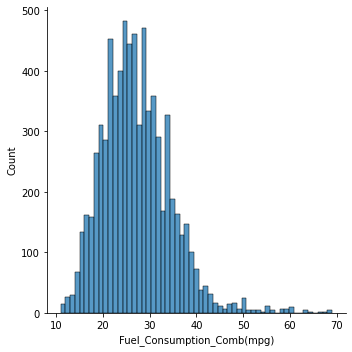

In [63]:
#histogrom using seaborn shwowing the destribution of Fuel Consumption

sb.displot(co2['Fuel_Consumption_Comb(mpg)'], kde=False);

> The graph is slightly right skewed with the majority of cars consuming between 20mpg t0 30mpg of Fuel

#### Investigating Fuel Type

> We need to see what is the most common type of fuel used among the vehicles 

In [64]:
 co2["Fuel_Type"].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_Type, dtype: int64

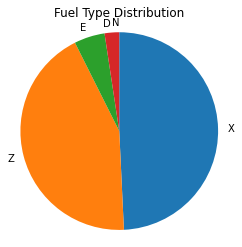

In [65]:
# we used a pie cchart to see what share of the data each fuel makes up

fuel_counts =  co2["Fuel_Type"].value_counts()

plt.pie(fuel_counts, labels=fuel_counts.index,startangle=90,counterclock= False)
plt.title('Fuel Type Distribution')
plt.axis('square');

Regular gasoline(X) is the most common fuel type, closely followed by Preium gasoline(X), the tird most common used fuel is Ethanol(E) with a count of 370, Diesel(D) has a count of 175 and natural gas only has 1 vehivle using it.

#### Engine Size
> engine size plays a big role in co2 emmissions so we need to see how the engine sizes are destributed amongst the vehicles

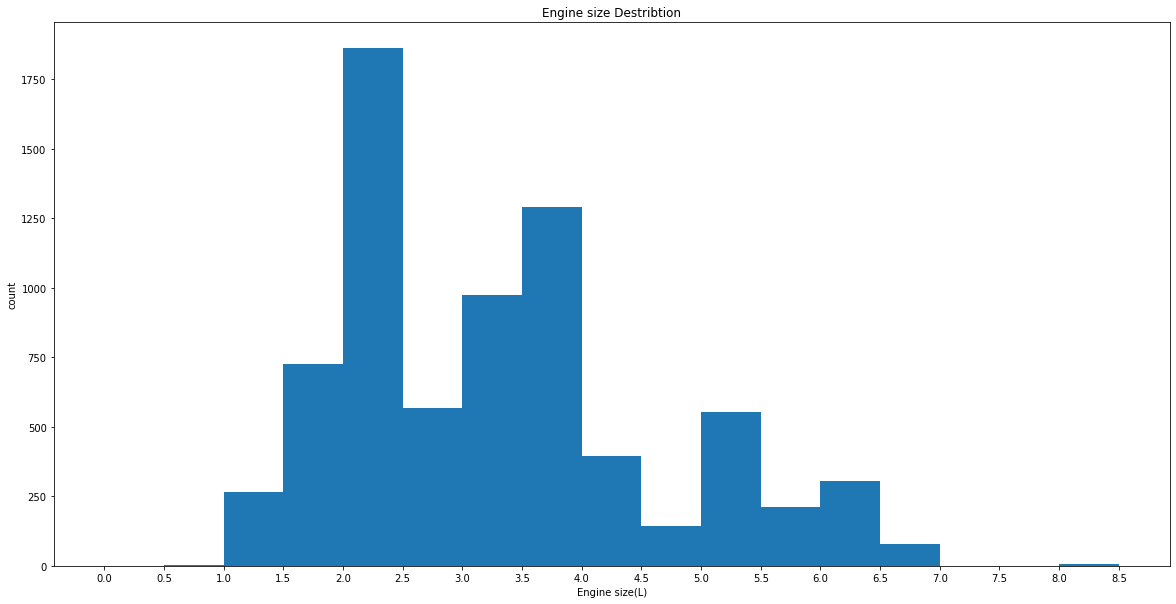

In [66]:
plt.figure(figsize=(20,10))
bins = np.arange(0, co2['Engine_Size(L)'].max()+0.5, 0.5)
plt.hist(data = co2, x = 'Engine_Size(L)',bins = bins)

#had to include change the frequency of x axis
plt.xticks(np.arange(0, co2['Engine_Size(L)'].max()+0.5, 0.5))
plt.xlabel('Engine size(L)')
plt.ylabel("count")
plt.title('Engine size Destribtion')
plt.show()

From the visualisation the majority of the vehicles have an engine size of 2.0L-2.5L with the highest engine size being 8.4L and the smallest being between 0.5L and 1.0L.

#### Now we are going to see what is the most occuring vehicle class in the data set

In [67]:
 co2["Vehicle_Class"].value_counts()

SUV_SMALL                  1217
MID_SIZE                   1133
COMPACT                    1022
SUV_STANDARD                735
FULL_SIZE                   639
SUBCOMPACT                  606
PICKUP TRUCK_STANDARD       538
TWO_SEATER                  460
MINICOMPACT                 326
STATION WAGON_SMALL         252
PICKUP TRUCK_SMALL          159
MINIVAN                      80
SPECIAL PURPOSE VEHICLE      77
VAN_PASSENGER                66
STATION WAGON_MID_SIZE       53
VAN_CARGO                    22
Name: Vehicle_Class, dtype: int64

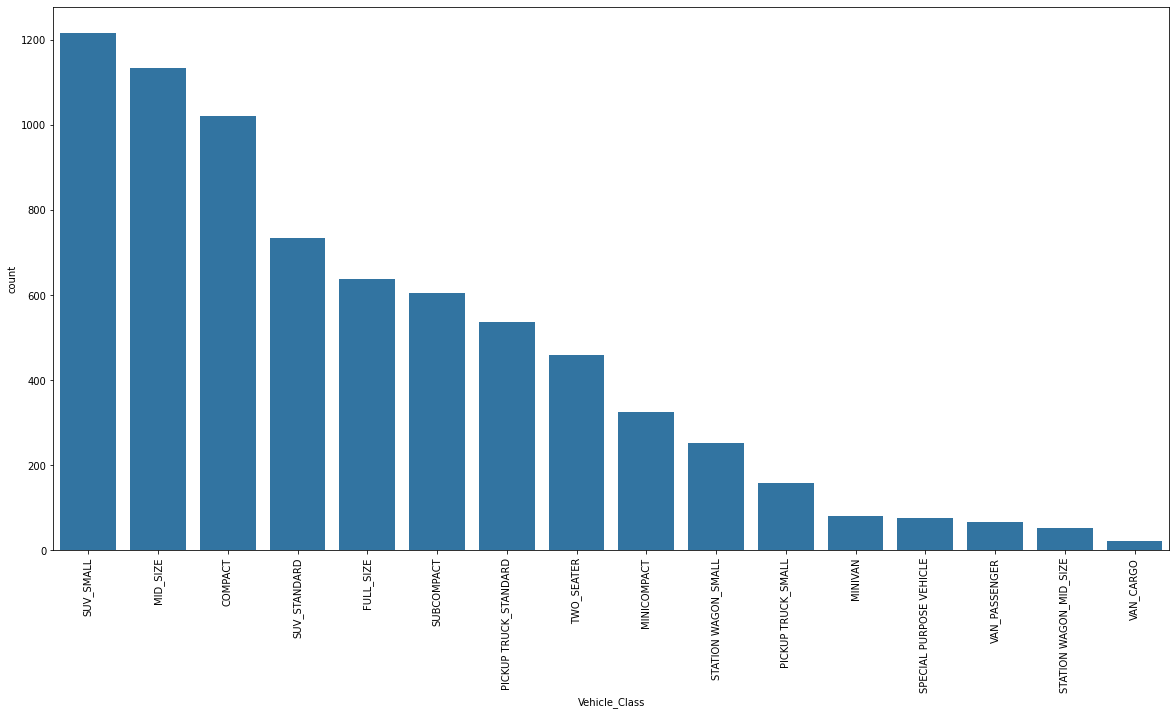

In [68]:
#creating an index
class_order = co2["Vehicle_Class"].value_counts().index
# potting a bar plot to show in one bas color to show the destribution of car makers
base_colour = sb.color_palette()[0]
#setting the figure size for more clarity
plt.figure(figsize=(20,10))
sb.countplot(data=co2, x='Vehicle_Class', color=base_colour, order=class_order);

# Using xticks to rotate the category labels counter-clockwise to fit
plt.xticks(rotation=90);


Small SUV is the most occuring vehicle class in this data frame with Mid six=ze and Compact all above one thousand.Van cargo is the least vehicle class.

#### Transmission

In [69]:
 co2["Transmission"].value_counts()

AS    3127
A     1851
M     1185
AM     646
AV     576
Name: Transmission, dtype: int64

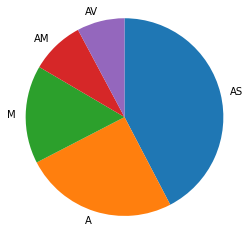

In [70]:
trans_counts =  co2["Transmission"].value_counts()

plt.pie(trans_counts, labels=trans_counts.index,startangle=90,counterclock= False)

plt.axis('square');

Automatic select shift(AS) makes up most of the the transmission types, with Automatic being the second most used transmission.

#### Lets also see which car maker has the most vehicles

In [71]:
#creating an index
make_order = co2["Make"].value_counts().index

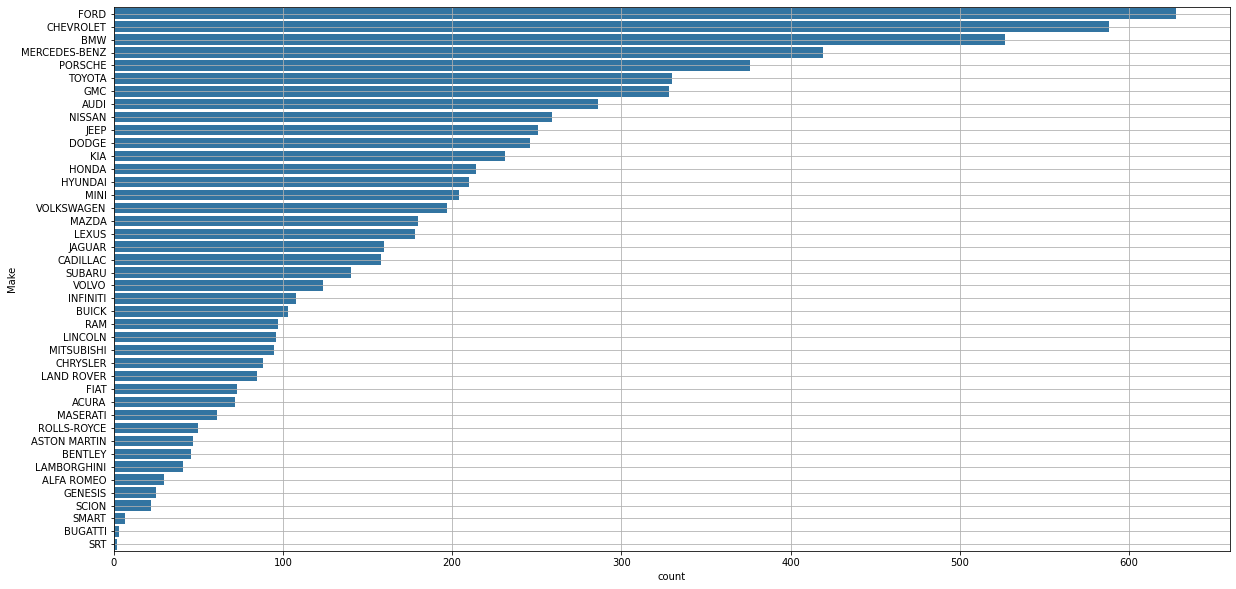

In [72]:
# potting a bar plot to show in one bas color to show the destribution of car makers
base_colour = sb.color_palette()[0]
#setting the figure size for more clarity
plt.figure(figsize=(20,10))
sb.countplot(data=co2, y='Make', color=base_colour, order=make_order);
plt.grid(True)

Ford,Cherolet and BMW are the three car makers with the most vehicles respectively, in this dataset. Surprisinlgy there were Bugatti's than SRT considering SRT is and a american make.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The engine sizes were mostly floats and as known most enigine sizes are decimals. So this led to the x-axis ticks being changed to increments of 0.5 to get a better view of the engine size destribution. 

> One other stand out was that there was only one vehicle using Natural gas. 

> Fuel consumption and CO2 emmissioons were both slightly right skewed suggesting there is a strog relationship between the two variables.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most destributions were within a normal destribution , but bin sizes for engine size had to be reconfigured to get a ore accurate destribution of the variable. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Engine size and CO2 emission

In [73]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Make                            7385 non-null   category
 1   Model                           7385 non-null   object  
 2   Vehicle_Class                   7385 non-null   category
 3   Engine_Size(L)                  7385 non-null   float64 
 4   Cylinders                       7385 non-null   int64   
 5   Transmission                    7385 non-null   category
 6   Fuel_Type                       7385 non-null   category
 7   Fuel_Consumption_City(L/100km)  7385 non-null   float64 
 8   Fuel_Consumption_Hwy(L/100km)   7385 non-null   float64 
 9   Fuel_Consumption_Comb(L/100km)  7385 non-null   float64 
 10  Fuel_Consumption_Comb(mpg)      7385 non-null   int64   
 11  CO2_Emissions(g/km)             7385 non-null   int64   
 12  CO2_Emissions(g/100k

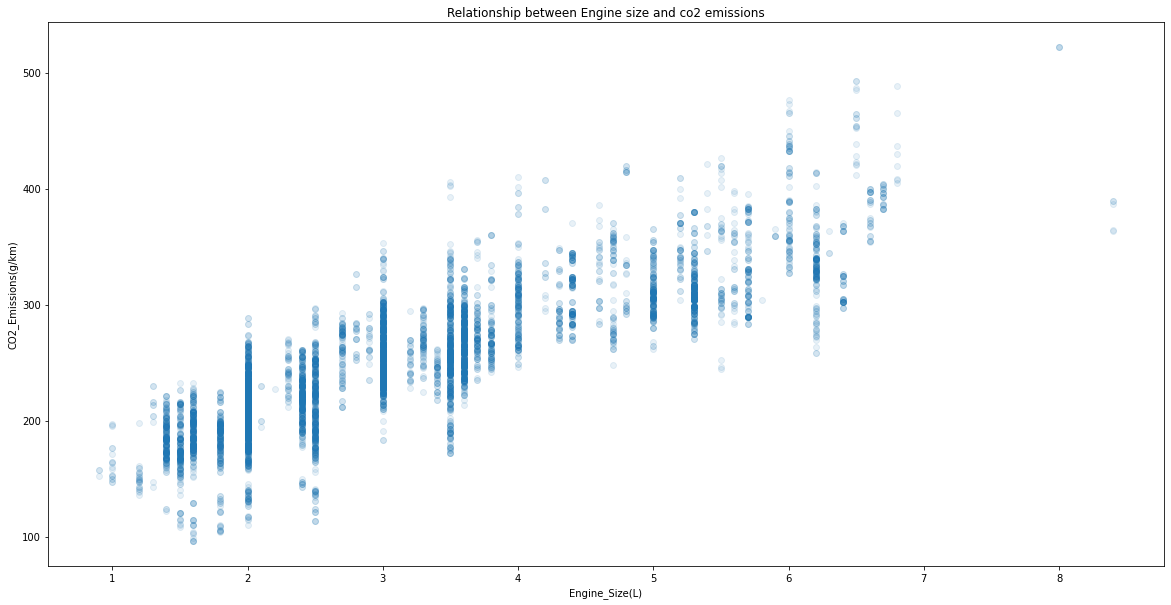

In [74]:
#plotting scatter plot with transparency
plt.figure(figsize=(20,10))

plt.scatter(data = co2, x = 'Engine_Size(L)', y = 'CO2_Emissions(g/km)', alpha= 1/10);
plt.xlabel('Engine_Size(L)')
plt.ylabel('CO2_Emissions(g/km)')
plt.title('Relationship between Engine size and co2 emissions');

As expected there is a posetive corelation between engine size and carbon dioxide emmisions. the bigger the engine size the more carbon deioxide it gives off. there is a wide destribution between cars with an engine size 2L-4L this mght be due to the fuel type being used in these engines. 

### CO2 and fuel consumtpion

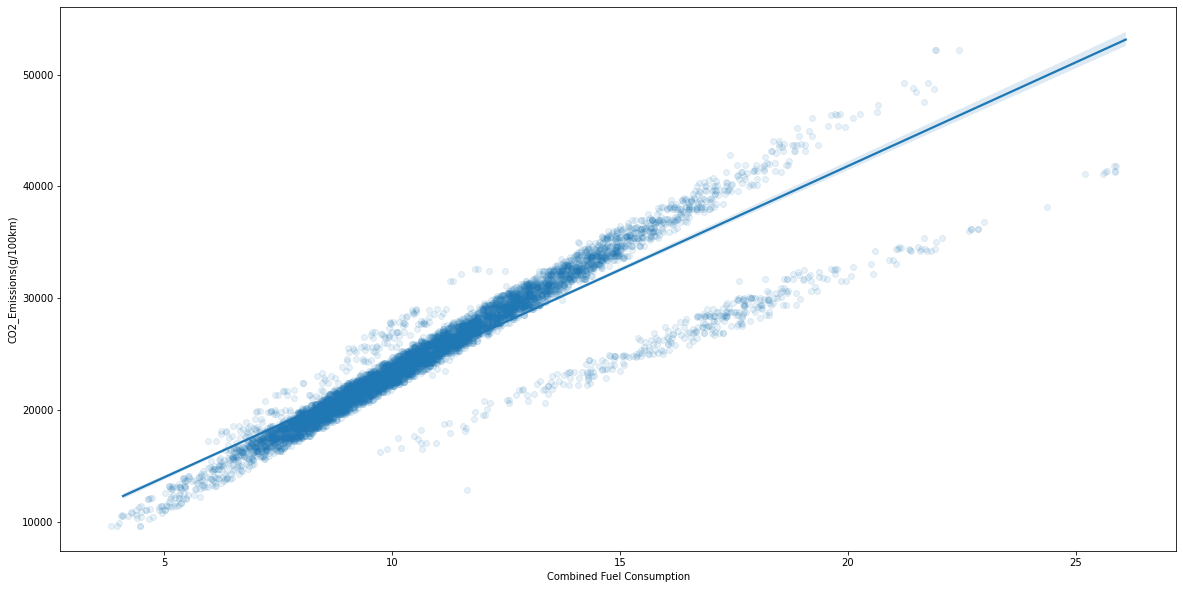

In [75]:
plt.figure(figsize=(20,10))
sb.regplot(data = co2, x = 'Fuel_Consumption_Comb(L/100km)', y = 'CO2_Emissions(g/100km)', x_jitter = 0.5,
          scatter_kws={'alpha':1/10} );
plt.xlabel('Combined Fuel Consumption')
plt.ylabel('CO2_Emissions(g/100km)')
plt.title('Relationship between Engine size and co2 emissions');;

For this graph the units of the CO2 emissions had to be changed to g/100km since it was being plotted against fuel consumption in L/100km. High concentration of between 7 to 14 L/100km of combined fuel consumption indicating that most cars had a fuel consumption of between 7 L/100km and 14L/km. the corresponding CO2  of this range is around 1.8kg/100km and 3.7kg/100km, there is a descrapancy where some cars with a fuelcounsuomtion of 11L/km to 21L/km had a  CO2 cemission of 2kg/100km to 3kg/km , which is lower than the line of best fit.

Engine size and Fuel Consumption

In [76]:
co2[['Engine_Size(L)', 'Fuel_Consumption_Comb(L/100km)' ]].describe()

Engine_Size(L)  Fuel_Consumption_Comb(L/100km)
count     7385.000000                     7385.000000
mean         3.160068                       10.975071
std          1.354170                        2.892506
min          0.900000                        4.100000
25%          2.000000                        8.900000
50%          3.000000                       10.600000
75%          3.700000                       12.600000
max          8.400000                       26.100000

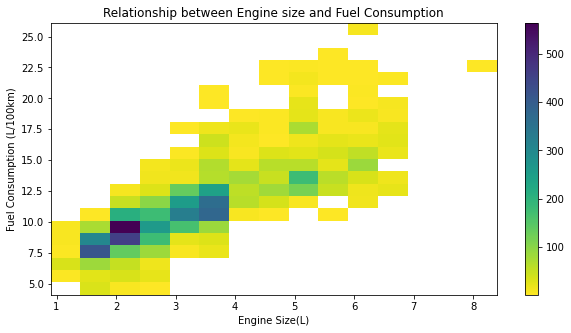

In [77]:
plt.figure(figsize=(10,5))


# Specify bin edges 
bins_x = np.arange(0.9, 8.4+0.5, 0.5)
bins_y = np.arange(4.1, 26.1+1, 1)

plt.hist2d(data = co2, x = 'Engine_Size(L)', y = 'Fuel_Consumption_Comb(L/100km)', cmin=0.7,cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title("Relationship between Engine size and Fuel Consumption")
plt.xlabel('Engine Size(L)')
plt.ylabel('Fuel Consumption (L/100km)');

the darker colour between 2L and 3L indiccated that is where most of the car engine sizes are concentrated. the bue hue gets lighter as the engine sizes approach 4L. Most of the cars habe a fuel consumtion of less than 12 L/100km wiht the highest concentration having a fuel consumtion of below 10 L/100km.

### Vehicle Class and Engine size

What is the average engine size of each class? Then rank them according to the engine sizes.

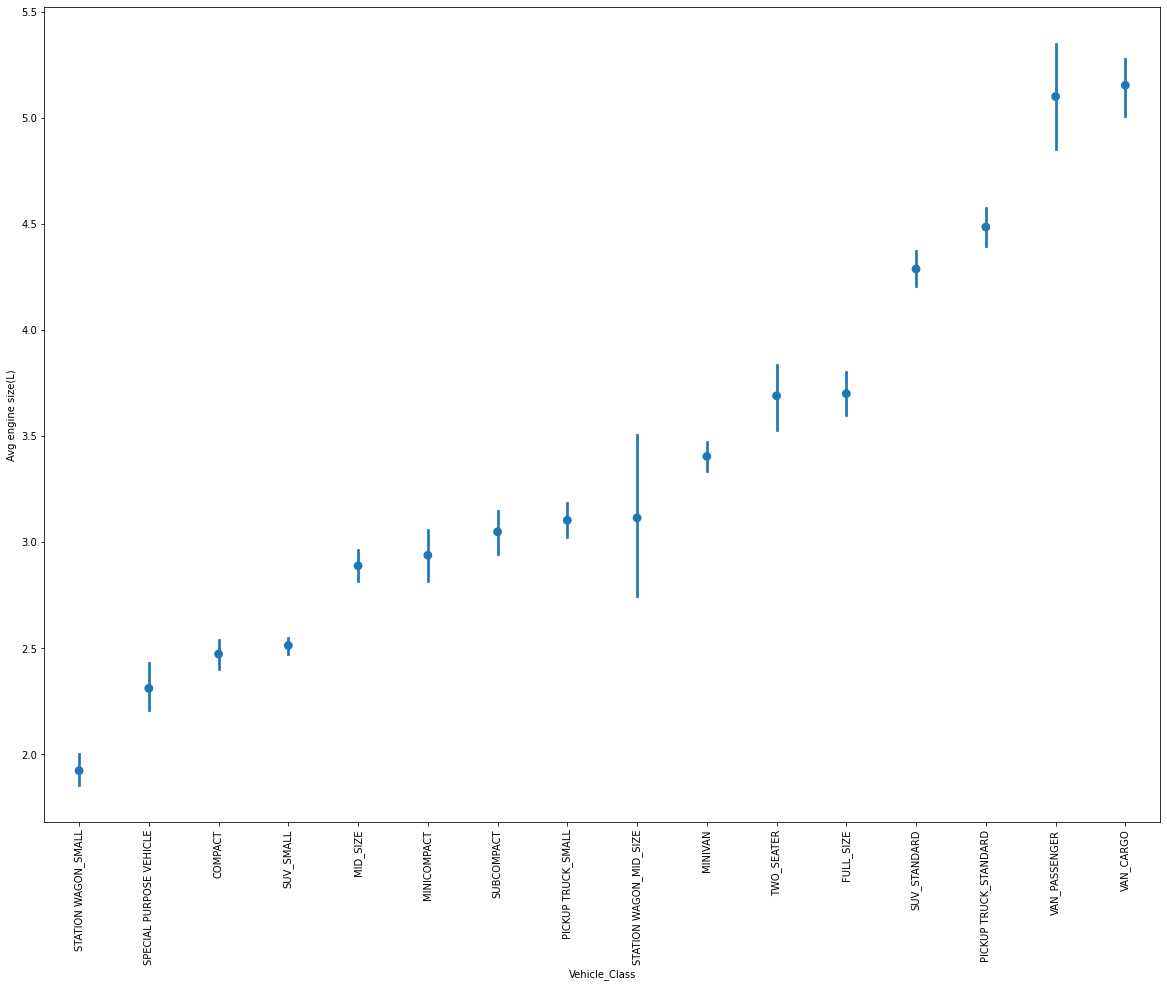

In [78]:
plt.figure(figsize=(20,15))

size_means = co2[['Vehicle_Class', 'Engine_Size(L)']].groupby(['Vehicle_Class']).mean()
size_means = size_means.sort_values(['Engine_Size(L)']).index
base_color = sb.color_palette()[0]
sb.pointplot(data=co2, x='Vehicle_Class', y='Engine_Size(L)',
             color=base_color, linestyles = "", order = size_means)
plt.ylabel('Avg engine size(L)')
plt.xticks(rotation =90);

Whilist we on engnine sizes, we in investigate how engine size is related to the vehicle classes. Small sation wagons have the smallest engine size avareging just below 2L. Mid sized station wagons have the biggest range of average engine size thats between 2.5L to 3.5L. A cargo Van has the largest engine size with an average  of 5.2L.

### Violin plot fuel type and co2 emissions

> Which Fuel type gives off the highest carbon dioxide and which one produces the least?

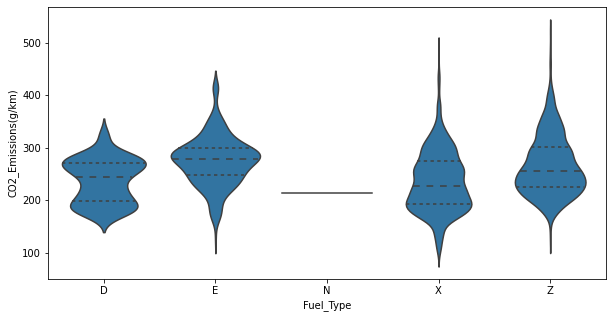

In [79]:
#setting fihure size to get the bigger pucture
plt.figure(figsize=(10,5))


base_color = sb.color_palette()[0]
sb.violinplot(data=co2, x='Fuel_Type', y='CO2_Emissions(g/km)', color=base_color, inner='quartile');



Violin plots of fuel type are showing the co2 emission of each type. from first glance Natural gas (N) has the lowest average of co2 emissions but from earlier analysis there was only one vehicle using Natural gas. Next lowest average is the Regular gasoline (X)  with an average just below 250 g/km but the violin plot of X has a long tail indicating that its data is widely spread and not as consistent. Diesel is second lowest with a shorter tail and a wider violin and indication that the data on diesel was more consistent. 

An unexpected result was observed with ethanol, from the visualisation above it has a higher average the Gasoline and diesel which is the opposite of what we expect of biofuels.But its interquarties are closer togeter than any other fuel types. 

### Clustered Bar Graph

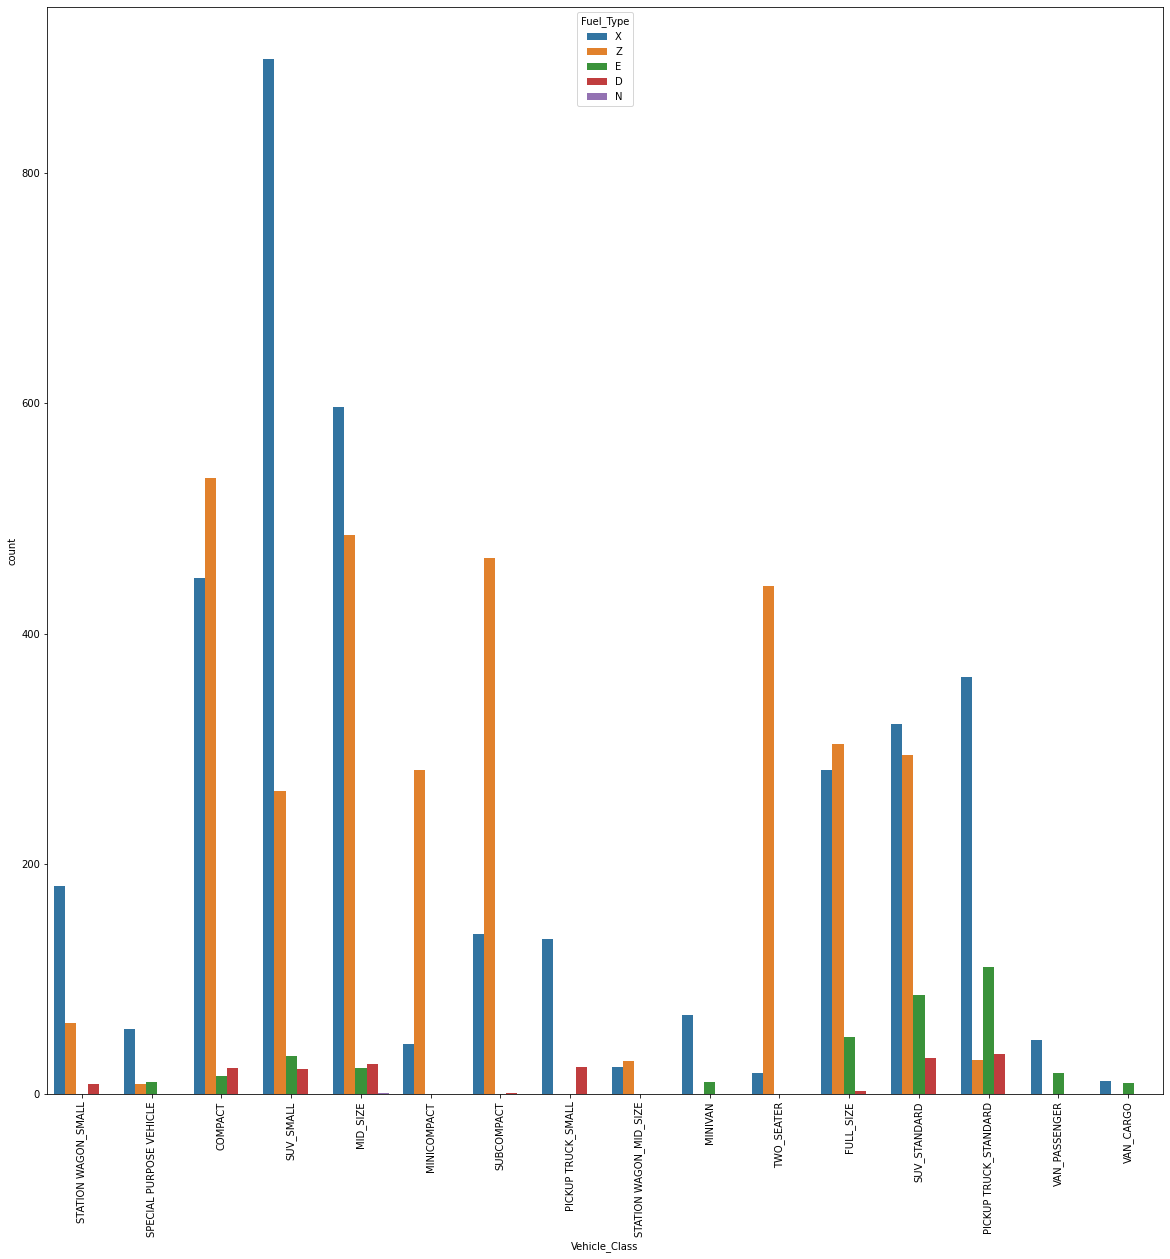

In [92]:
#clustered bar graph with seaborn 
plt.figure(figsize=(20,20))
sb.countplot(data=co2, x = 'Vehicle_Class', hue = 'Fuel_Type', hue_order= ['X','Z','E','D','N'], order = size_means)
plt.xticks(rotation=90);

Clustered bar graph showing the fuel type of each vehicle class. Small SUVs have the largest number of regular gasoline(X), compact cars have the largest nuber of premium gasoline(z), which makes some sense beacuse compact cars include sports cars. Standard pick up trucks have more ethanol fuel and diesel types than any class.

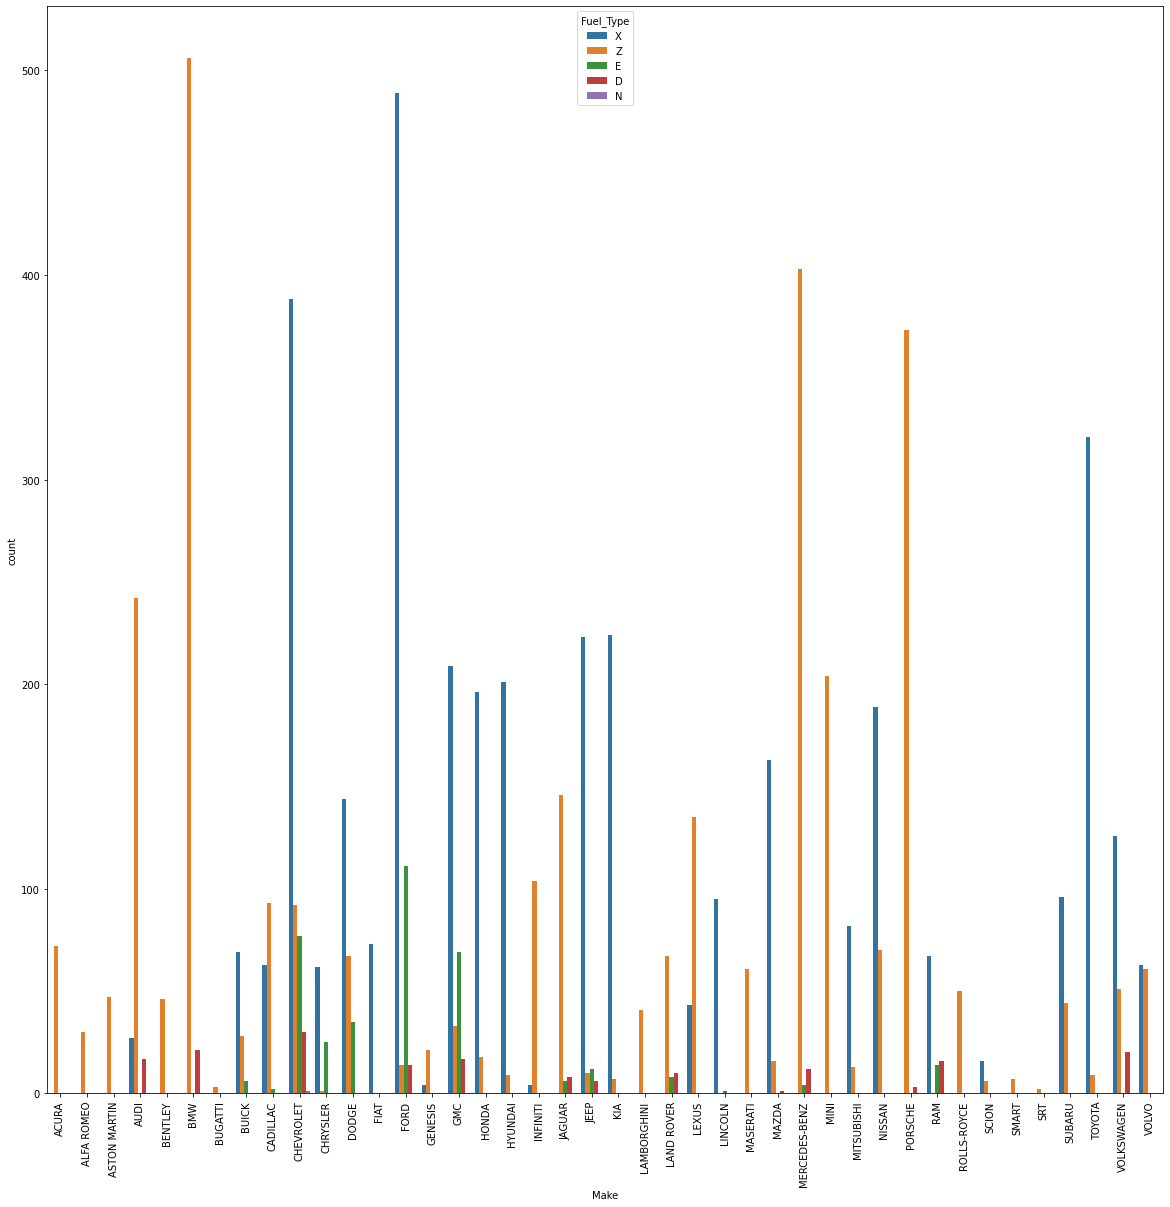

In [93]:

plt.figure(figsize=(20,20))
sb.countplot(data=co2, x = 'Make', hue = 'Fuel_Type', hue_order= ['X','Z','E','D','N'])
plt.xticks(rotation=90);

Now we investigate what car make is produces the more evironmentlally friendly fuels.BMW and Ford have the highest counts of premium and regular gas respectively. Ford also has the most vehicles that use Ethanol. But the big picture is that most car brands still make more vehicles that use petrol based fuels. 

### Faceting Vehicle class and Co2 emmission


In [82]:
co2[['CO2_Emissions(g/km)' ]].describe()

CO2_Emissions(g/km)
count          7385.000000
mean            250.584699
std              58.512679
min              96.000000
25%             208.000000
50%             246.000000
75%             288.000000
max             522.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be r

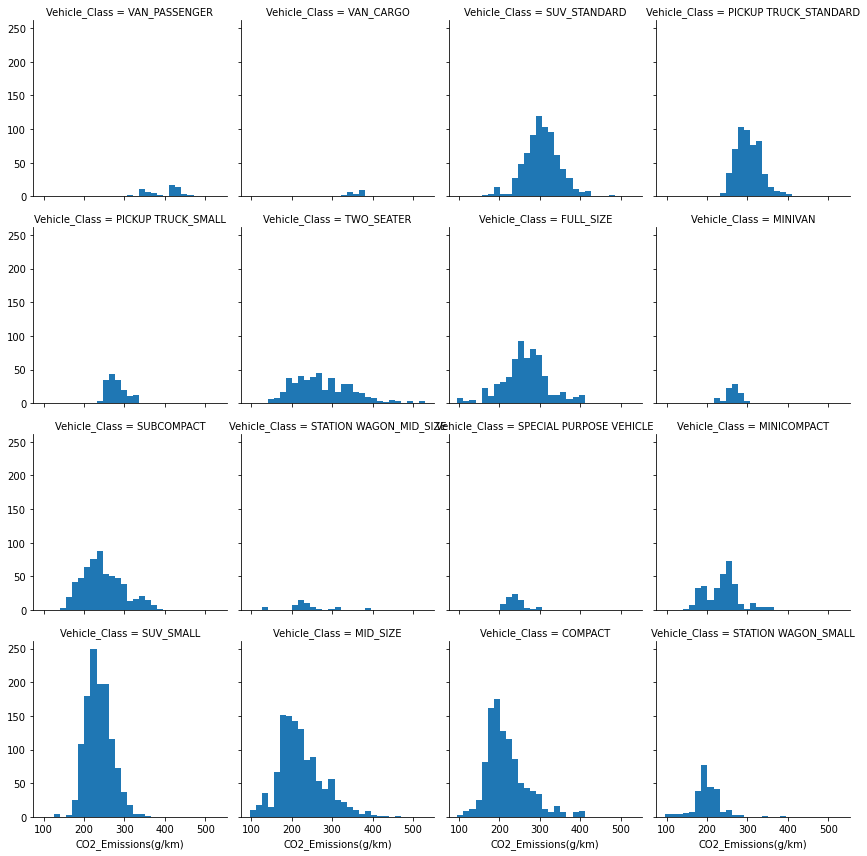

In [83]:

bins = np.arange(96, 522+15, 15)
# setting  the order  to display the Facets
# determing the combined co2 emmissions for each vehicle class
class_means = co2[['Vehicle_Class', 'CO2_Emissions(g/km)']].groupby(['Vehicle_Class']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
class_order = class_means.sort_values(['CO2_Emissions(g/km)'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = co2, col = 'Vehicle_Class', col_wrap = 4, col_order = class_order)
g.map(plt.hist, 'CO2_Emissions(g/km)', bins=bins);

Small SUVs, Mid-sized and compact vhicles have the highest right skewed destribution meaning that most of these vehicles have co2 emission lower than the average or just around the average co2 emission. Standard SUV and pick up turcks have the most vehicles that produce co2 higher than the average this might be because thses vehicles are much larger than the previously mentioned vehicle classes. Cargo Vans and Passenger vans have some of the lowest count but they producing the hoghest co2 emissions and this in accordance to their engine sizes since the two classes have the largest engine sizes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Unsurprisingly there was a positive linear relationship between co2 emissions and engine size meaning that bigger eni=giness were releasing more carbon dioxide. 3 vehicles were beyond the 8L engine size mark and these were Buggatis  the fastest car in the dataset. CO2 emissions also showed a positive corelation with combined fuel consumption there was some interesting points that fell way below the line of best fit. These points were among the high fuel consumption range but had lower co2 emissions than expected.

The investigation between Engine size and fuel consumption showed that most vehicle 2L-3L range engine size had the highest concentration of vehicles and showing a linear relationship.
The fuel type that showed to release the least CO2 was regular gasoline but it had more outliers and a wider IQR. in comparison  diesel had a shorter IQR  with less outliers but ethanol had the shortes inter quartile range suggesting that is co2 emissions were more consistent across vehicle classes.

Small SUVs with an average engine size of  2.5L had the highest number of vehicles using regular gasoline, compact vehicle had the hghes use of premium gasoline and standard pick up trucks used more diesel and ethanol. We will investigate further how all these factores when put together show which vehicle is having the least contribution to CO2 emissions.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> BMW was the third highest car make in this dataset but it had the highest number of vehicles using premium gasoline(Z). Premium gasoline was the fuel type with highest CO2 emissions average. Mercedes benz had the 2nd highest premium gasoline(Z) and tboth these car makes are German. Upon further inspection it seems like most european car makes had premium gasline as the highest fuel type used  with exception of Volkswagen and Volvo. In contrast most American car makes had the highest regualr gasoline(X) use.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Analysing Fuel type, Vehicle class, Engine Size and CO2 emissions further

In [84]:

co2['Fuel_Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_Type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. U

Text(915.0610743204754, 0.5, 'CO2_Emissions(g/km)')

<Figure size 1440x720 with 0 Axes>

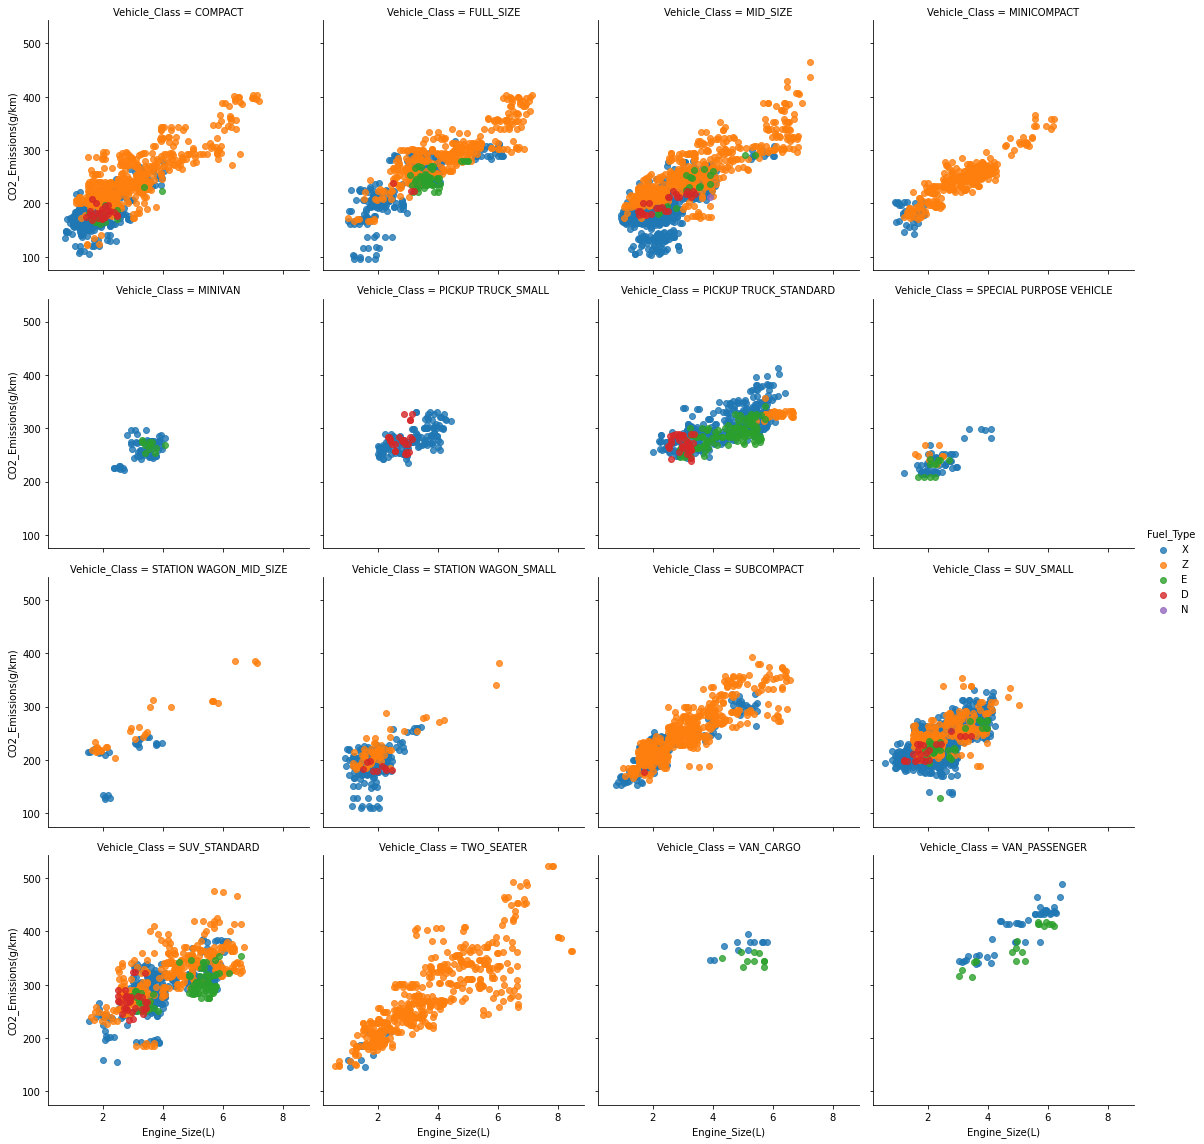

In [94]:
#facetgriid to investigate 3 variables at the sametime 

plt.figure(figsize=(20,10))
#setting hue type to the fuel types
f = sb.FacetGrid(data = co2, hue = 'Fuel_Type', col='Vehicle_Class', col_wrap = 4,
                 hue_order= ['X','Z','E','D','N'],size = 4, aspect = 1)
f = f.map(sb.regplot, 'Engine_Size(L)', 'CO2_Emissions(g/km)', x_jitter = 0.5, fit_reg =False);
f.add_legend()
plt.xlabel('Engine_Size(L)')
plt.ylabel('CO2_Emissions(g/km)')
#plt.title('Relationship between Engine size, co2 emissions and fuel type');

The scatter plots were arranged in columns of vehicle class, engine sizes on the x-axis, co2 emission on the y-axis and the color of the points indicating the fuel type used. For compact vehicles they have a high concentration of vehicles in the 0L-2.5L range using regular gasoline(X) and having a lower co2 emission than vehicles using premium gasoline. Another trend observed was that the compact vehicles that used premium gasoline had an engine size of greater than 2.0L and the relationship to co2 emissions had a steeper gradient than those using regular gasoline. This trend continues for Full sized vehicles and mid sized vehicles.Mini compact vehicles' regression line is less steep compared to the above mentioned and have smaller engine sizes, suggesting that its relationship between increasing  engine size and CO2 emissions for premium gasoline(Z)  has a lower regression line than Compact or Full sized vehicles. But its co2 emissions for regular gasoline start higher than vehicles with the same engine size in the same row.

Minivan had very few points but all closely plotted together and only showed two fuel types: regular gasoline(X) and ethanol(E). Small pickup trucks had two fuel types, regular gas and diesel, and its engine sizes were above 2L and less than 3.2L but it had had higher  co2 emissions compared to vehicles in the first row with the same fuel type and engine size. Standard pickup trucks had the highest number of ethanol but the graph shows that ethanol was emitting more carbon dioxide than diesel and less than regular gas.

Small Station wagons and small suv had the left most concentrated point of the third releasing less carbon dioxide than Mid size station wagon and sub compact vehicles. Small SUVs had the highest number of ethanol use but unlike Standard pick up trucks, it released fairly less carbon dioxide than regular gas. This may be due to the smaller engine sizes.

The fourth row had the vehicles with some of the highest CO2 emissions in all fuel types. Standard SUVs had more diversity in fuel types and its points were closer together. In contrast two seaters had a lot of scatter and the most common fuel type that released a lot of carbon dioxide was premium gasoline(Z) the plots still showed an upward trend between engine size and CO2 emissions. Van cargo’s engine sizes was between 4L-6L with two fuel types ethanol(E) and regular gas. Its emissions from ethanol were much higher than other vehicle classes with the same engine size range; the same can be said for Passenger van vehicles but these have a wider range in engine size. May be the rate of fuel consumptions has a bigger impact on co2 emissions rather than engine size.This will be investigated next.
 



CLoser look at vehicle class, fuel consumption and fuel type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. U

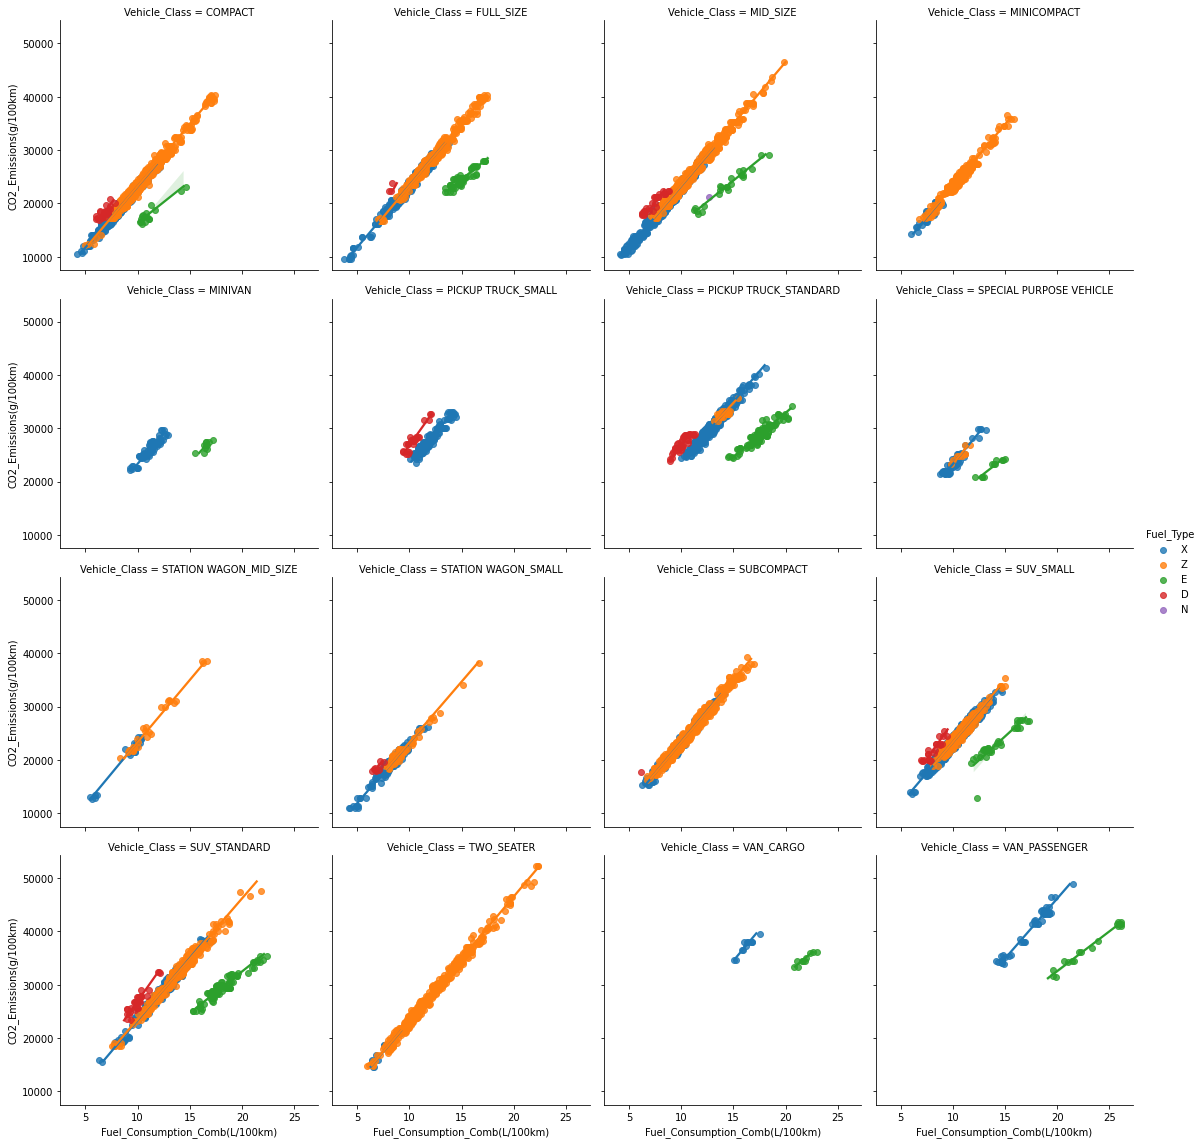

In [96]:

f = sb.FacetGrid(data = co2, hue = 'Fuel_Type', col='Vehicle_Class', col_wrap = 4,
                 hue_order= ['X','Z','E','D','N'],size = 4, aspect = 1)
f = f.map(sb.regplot, 'Fuel_Consumption_Comb(L/100km)', 'CO2_Emissions(g/100km)', x_jitter = 0.5);
f.add_legend()
plt.xlabel('Fuel_Consumption_Comb(L/100km)')
plt.ylabel('CO2_Emissions(g/km)');


From the  first plot of Compact cars we can see a high positive  correlation between carbon dioxide emissions and the combined fuel consumption across all fuel types. Diesel has the highest rate of fco2 emissions being released in all vehicle types; it has a higher regression line than all fuel types.  All the plots of vehicles with regular gasoline and premium gasoline indicate that regular  gas starts at a lower rate of fuel consumption than premium gasoline but from there onwards as fuel consumption increases both fuel types release carbon dioxide at the same rate. 

This graph also provides a clearer picture on Ethanol which is an alternative fuel to petroleum based fuels. Ethanol has a lower rate of change in fuel consumption and the amount of CO2 released. Comparing it with the other fuel types like regular and premium gasoline, ethanol's regression line is much lower and less steeper than these two fuels.another observation to take note of is that although its fuel consumption is higher it has a much lower co2 emission compared to Diesel, regular and premium gas.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Each vehicle class had different engine sizes but classes such as Compact, full sized, mincompact, subcompact Standard suv and two seaters had some of the widest engine size ranges varying from 1 L to 8L. Classes such as minivan small pickup trucks, special purpose vehicles , cargo vans and passenger vans had some of the shortest engine size range but more noticeably they had the fewest fuel types within their classes. The relationship that was clear with engine size and co2 emissions was a direct proportion relationship. As engine size increased so did co emissions regardless of fuel type. Regular gas(X) was more common in smaller engine sizes than all other fuel types. According to these scatter plots of engine size, co2 emissions and fuel type regular gas gave out less emissions than diesel(D) and premium gas(Z) for vehicles in the same engine range. Ethanol in different vehicle classes of the same engine size had inconsistent co2 emissions and this was the case across all fuel types so another deep dive was conducted replacing engine size with fuel consumption.

These regression line plots provided a more detailed look as to which type of fuel and vehicle class has the least co2 emission and fuel consumption. Regular gasoline has the lowest rate of fuel consumption across most vehicle types but the lowest being observed in the Full sized, compact, mid sized and the small station wagon vehicle class.The co2 emissions of regular gasoline were similar to the premium gasoline but at a slightly lower fuel consumption. In fct premium gasoline had the highest rate of co2 emissions and fuel consumption. Diesel had a low fuel consumption but very high co2 emission, higher than regular and premium gas. Finally y Ethanol showed a trend that in agreement with the whole reason for making alternative fuels. Ethanol had the lowest rate of CO2 emissions but had a higher fuel consumption in almost all the vehicles that used ethanol in their engines.

### Were there any interesting or surprising interactions between features?

Earlier when fuel consumption was plotted against CO2 emissions there was a 2nd cluster of points beneath forming a positive linear relationship beneath the main clusters of points. After further investigation it is clear that the 2nd clust of point was of points from the Ethanol fuel type which has the lowest CO2 emissions rate

## Conclusions
The following conclusions were made after exploring this dataset on CO2 emissions.COmpact and sized vehicles have the lowest CO2 emissions amongst all the other vehicles. An engine size of less than 3.0L L is more ideal to keep co2 emissions at a minimum. Finally Ethanol has the lowest carbon dioxide emissions of all the fuel types although it has one  of the highest fuel consumption rates and Ford motor company is the highest producer of cars that use Ethanol in this dataset. So if the car is a Compact or Midsize Ford using Ethanol fuel and having  a 2.7L engine to make up for the high fuel consumption of Ethanol then it will be the most environmentally friendly vehicle from this dataset.
